In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks/FIN protein data')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('finland-census.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2814 entries, 0 to 2813
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   POSTAL CODE        2814 non-null   object 
 1   NEIGHBORHOOD NAME  2814 non-null   object 
 2   REGION             2814 non-null   object 
 3   unemployment       2814 non-null   float64
 4   education          2814 non-null   float64
 5   income             2814 non-null   int64  
 6   sing-fam           2814 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 154.0+ KB


In [ ]:
df.describe()

,unemployment,education,income,sing-fam
count,2814.000000,2814.000000,2814.000000,2814.000000
mean,0.053956,0.271141,40564.400498,0.119000
std,0.024115,0.074900,8930.377849,0.017207
min,0.000000,0.054545,21407.000000,0.049814
25%,0.038032,0.216777,35056.250000,0.109522
50%,0.050633,0.271249,39106.000000,0.118825
75%,0.066294,0.322581,44300.750000,0.127415
max,0.209677,0.593220,152857.000000,0.304348


In [ ]:
df.columns

Index(['POSTAL CODE', 'NEIGHBORHOOD NAME', 'REGION', 'unemployment',
       'education', 'income', 'sing-fam'],
      dtype='object')

In [ ]:
df.dropna(inplace=True)

In [ ]:
df_drop = df[[col for col in list(df.columns) if col not in ['POSTAL CODE', 'NEIGHBORHOOD NAME', 'REGION', 'unemployment', 'sing-fam']]]

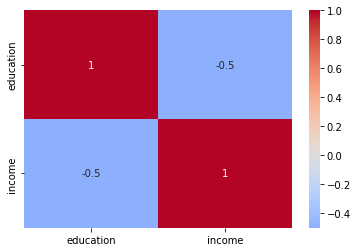

In [ ]:
# correlation matrix amoing SES factors, by dissemination area from 2016 census

plt.figure()
sns.heatmap(df_drop.corr(), annot = True, cmap='coolwarm', center=0)
plt.show()

In [ ]:
# scale data between 0-1

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(data = scaler.fit_transform(df_drop),
                         columns = df_drop.columns)
df_scaled.head()

,education,income
0,0.000000,0.217277
1,0.001264,0.234690
2,0.034577,0.410133
3,0.063925,0.235352
4,0.068954,0.242062


Text(0.5, 1.0, 'Elbow Curve to find optimal k')

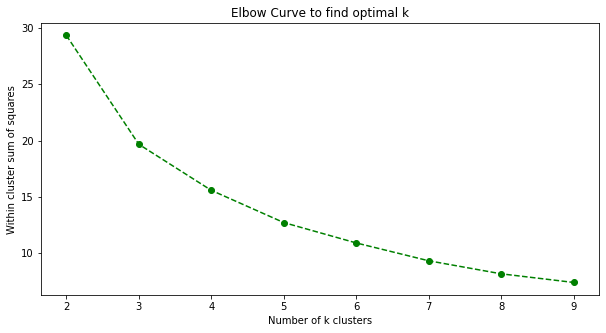

In [ ]:
k = list(range(2,10))
sum_of_squared_distances = []
for i in k:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(k, sum_of_squared_distances, 'go--')
plt.xlabel('Number of k clusters')
plt.ylabel('Within cluster sum of squares')
plt.title('Elbow Curve to find optimal k')

In [ ]:
# building k-means model

# Instantiating
kmeans3 = KMeans(n_clusters = 3)

# Training the model
kmeans3.fit(df_scaled)

# predicting
y_pred = kmeans3.fit_predict(df_scaled)
print(y_pred)

# Storing the y_pred values in a new column
df['cluster'] = y_pred+1 #to start the cluster number from 1

[1 1 1 ... 2 2 2]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2814 entries, 0 to 2813
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   POSTAL CODE        2814 non-null   object 
 1   NEIGHBORHOOD NAME  2814 non-null   object 
 2   REGION             2814 non-null   object 
 3   unemployment       2814 non-null   float64
 4   education          2814 non-null   float64
 5   income             2814 non-null   int64  
 6   sing-fam           2814 non-null   float64
 7   cluster            2814 non-null   int32  
dtypes: float64(3), int32(1), int64(1), object(3)
memory usage: 186.9+ KB


In [ ]:
df.describe()

,unemployment,education,income,sing-fam,cluster
count,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000
mean,0.053956,0.271141,40564.400498,0.119000,1.846837
std,0.024115,0.074900,8930.377849,0.017207,0.826375
min,0.000000,0.054545,21407.000000,0.049814,1.000000
25%,0.038032,0.216777,35056.250000,0.109522,1.000000
50%,0.050633,0.271249,39106.000000,0.118825,2.000000
75%,0.066294,0.322581,44300.750000,0.127415,3.000000
max,0.209677,0.593220,152857.000000,0.304348,3.000000


In [ ]:
df.to_csv('Finland postal codes with SES cluster.csv')